<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="images/book_cover.jpg" width="120">

*This notebook contains an excerpt from the [Python Programming And Numerical Methods: A Guide For Engineers And Scientists](); the content is available [on GitHub]().*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book]()!*

<!--NAVIGATION-->
< [20.4 Numerical Differentiation with Noise](chapter20.04-Numerical-Differentiation-with-Noise.ipynb) | [Contents](Index.ipynb) | [CHAPTER 21. Numerical Integration](chapter21.00-Numerical-Integration.ipynb) >

# Summary


1. Because explicit derivation of functions is sometimes cumbersome for engineering applications, numerical approaches can be preferable.
2. Numerical approximation of derivatives can be done using a grid on which the derivative is approximated by finite differences.
3. Finite differences approximate the derivative by ratios of differences in the function value over small intervals.
4. Finite difference schemes have different approximation orders depending on the method used.
5. There are issues with finite differences for approximation of derivatives when the data is noisy.

# Problems

1. Write a function $my\_der\_calc(f, a, b, N, option)$, with the output as $[df, X]$, where $f$ is a function object, $a$ and $b$ are scalars such that a < b, $N$ is an integer bigger than 10, and $option$ is the string $forward$, $backward$, or $central$. Let $x$ be an array starting at $a$, ending at $b$, containing $N$ evenly spaced elements, and let $y$ be the array $f(x)$. The output argument, $df$, should be the numerical derivatives computed for $x$ and $y$ according to the method defined by the input argument, $option$. The output argument $X$ should be an array the same size as $df$ containing the points in $x$ for which $df$ is valid. Specifically, the forward difference method "loses" the last point, the backward difference method loses the first point, and the central difference method loses the first and last points.

2. Write a function $my\_num\_diff(f, a, b, n, option)$, with the output as $[df, X]$, where $f$ is a function object. The function $my\_num\_diff$ should compute the derivative of $f$ numerical for $n$ evenly spaced points starting at $a$ and ending at $b$ according to the method defined by $option$. The input argument $option$ is one of the following strings: 'forward', 'backward', 'central'. Note that for the forward and backward method, the output argument, $dy$, should be $(n-1)$ 1D array, and for the central difference method $dy$ should be $(n-2)$ 1D array. The function should also output a vector $X$ that is the same size as $dy$ and denotes the x-values for which $dy$ is valid.

 Test Cases:
 
 ```python
 x = np.linspace(0, 2*np.pi, 100)
 f = lambda x: np.sin(x)
 [dyf, Xf] = my_num_diff(f, 0, 2*np.pi, 10, 'forward')
 [dyb, Xb] = my_num_diff(f, 0, 2*np.pi, 10, 'backward')
 [dyc, Xc] = my_num_diff(f, 0, 2*np.pi, 10, 'central')
 plt.figure(figsize = (12, 8))
 plt.plot(x, np.cos(x), label = 'analytic')
 plt.plot(Xf, dyf, label = 'forward')
 plt.plot(Xb, dyb, label = 'backward')
 plt.plot(Xc, dyc, label = 'central')
 plt.legend()
 plt.title('Analytic and Numerical Derivatives of Sine')
 plt.xlabel('x')
 plt.ylabel('y')
 plt.show()
 ```
 
 ![](images/20.05.01-Q2-1.png "Test case for Question 2")
 
 ```python
 x = np.linspace(0, np.pi, 1000)
 f = lambda x: np.sin(np.exp(x))
 [dy10, X10] = my_num_diff(f, 0, np.pi, 10, 'central')
 [dy20, X20] = my_num_diff(f, 0, np.pi, 20, 'central')
 [dy100, X100] = my_num_diff(f, 0, np.pi, 100, 'central')
 plt.figure(figsize = (12, 8))
 plt.plot(x, np.cos(np.exp(x)), label = 'analytic')
 plt.plot(X10, dy10, label = '10 points')
 plt.plot(X20, dy20, label = '20 points')
 plt.plot(X100, dy100, label = '100 points')
 plt.legend()
 plt.title('Analytic and Numerical Derivatives of Sine')
 plt.xlabel('x')
 plt.ylabel('y')
 plt.show()
 ```
 
 ![](images/20.05.01-Q2-2.png "Test case for Question 2")
 
3. Write a function $my\_num\_diff\_w\_smoothing(x, y, n)$, with the output $[dy, X], $where $x$ and $y$ are 1D numpy array of the same length, and $n$ is a strictly positive scalar. The function should first create a vector of "smoothed" $y$ data points where $y\_smooth[i] = np.mean(y[i-n:i+n])$. The function should then compute $dy$, the derivative of the smoothed $y$-vector using the central difference method. The function should also output a 1D array $X$ that is the same size as $dy$ and denotes the x-values for which $dy$ is valid.

 Assume that the data contained in $x$ is in ascending order with no duplicate entries. However, it is possible that the elements of $x$ will not be evenly spaced. Note that the output $dy$ will have $2n + 2$ fewer points than $y$. Assume that the length of $y$ is much bigger than $2n + 2$.
 
 Test Cases:
 ```python
 x = np.linspace(0, 2*np.pi, 100)
 y = np.sin(x) + np.random.randn(len(x))/100
 [dy, X] = my_num_diff_w_smoothing(x, y, 4)
 plt.figure(figsize = (12, 12))
 plt.subplot(211)
 plt.plot(x, y)
 plt.title('Noisy Sine function')
 plt.xlabel('x')
 plt.ylabel('y')
 plt.subplot(212)
 plt.plot(x, np.cos(x), 'b', label = 'cosine')
 plt.plot(x[:-1], (y[1:] - y[:-1])/(x[1]-x[0]), 'g', label = 'unsmoothed forward diff')
 plt.plot(X, dy, 'r', label = 'smoothed')
 plt.title('Analytic Derivative and Smoothed Derivative')
 plt.xlabel('x')
 plt.ylabel('y')
 plt.legend()
 plt.tight_layout()
 plt.show()
 ```
 
  ![](images/20.05.01-Q3.png "Test case for Question 3")
  
4. Use Taylor series to show the following approximations and their accuracy.
$$
\begin{eqnarray*}
f''(x_j) &=& \frac{-f(x_{j+3})+4f(x_{j+2}) - 5f(x_{j+1}) + 2f(x_j)}{h^2} + O(h^2),\\
f'''(x_j) &=& \frac{f(x_{j+3})-3f(x_{j+2}) +3f(x_{j+1}) - f(x_j)}{h^3} + O(h).
\end{eqnarray*}
$$


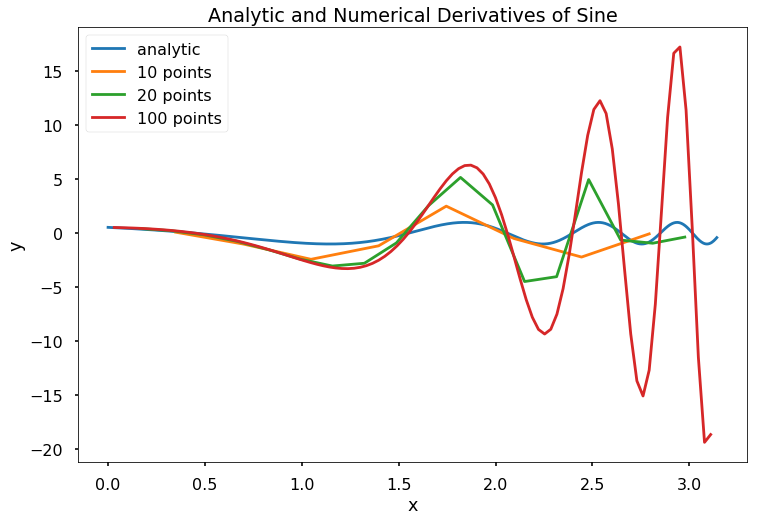

<!--NAVIGATION-->
< [20.4 Numerical Differentiation with Noise](chapter20.04-Numerical-Differentiation-with-Noise.ipynb) | [Contents](Index.ipynb) | [CHAPTER 21. Numerical Integration](chapter21.00-Numerical-Integration.ipynb) >